# Solutions - Homework 1

## Question 1: Inverse Method for geometric random variates

1. Use the inverse method and the language $Unif[0,1]$ generator (runif in R, numpy.random.uniform in python), to generate random variates from a geometric distribution with probability of success $p$. Both $p$ and the number of random variates should be arguments to your function.
2. For some particular $p$ of your choosing, make a plot of the proportion of random variates taking each value and plot the true geometric probability mass function on top to confirm that the generator is working.
3. Compare the speed of your geometric generator to the language generator (rgeom in R, numpy.random.geometric in python). Try to make your generator computationally competitive with the built in generator, by avoiding for loops and other slow code.
4. How do you think your method would compare to an approach that generates a sequence of random trials with probability $p$ of success until the first success and then records the number of failures until the first success? Why?

In [1]:
## part 1
## see example 22.3.5 in the Lange textbook
%matplotlib inline 
import numpy as np
import scipy.stats as stats
from numpy import random
import matplotlib.pyplot as plt

In [2]:
def geom_rand(n,p):
    lam = -np.log(1-p)
    return np.floor(-np.log(np.random.uniform(size=n))/lam)

In [3]:
## question 2
n = 10000
p = 0.25
x = geom_rand(n,p)

In [4]:
print(np.mean(x))
print(np.std(x))

2.9105
3.365277068831035


In [5]:
%%capture
## see https://jakevdp.github.io/PythonDataScienceHandbook/04.05-histograms-and-binnings.html
hist_out = plt.hist(x,bins=np.arange(np.max(x)+1),density=True)[0];

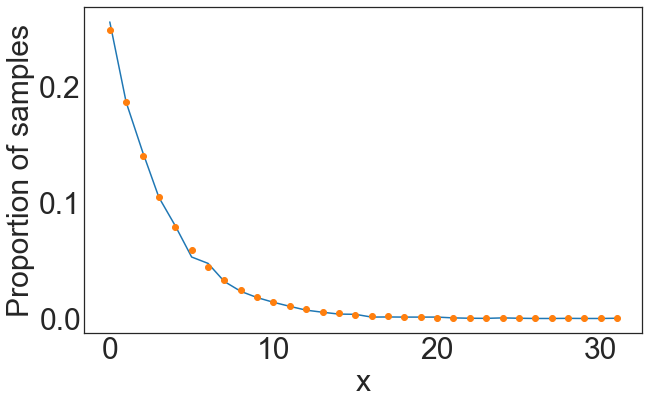

In [6]:
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams.update({'font.size': 30})
plt.style.use('seaborn-white')
plt.plot(np.arange(np.max(x)),hist_out);
plt.xlabel('x');
plt.ylabel('Proportion of samples');
t = np.arange(np.amax(x))
plt.plot(t,stats.geom.pmf(t+1,p),'o');

In [7]:
## question 3
n = 100000
%timeit y = np.random.geometric(p,n)

2.99 ms ± 10.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
%timeit y = geom_rand(n,p)
## if anything, the computation time seems better (though it may differ for different p). Also note that %timeit does not
## include garbage collection time (freeing memory when it is no longer used).
## See https://docs.python.org/3/library/timeit.html

1.41 ms ± 4.31 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Part 4

Our method should be much faster because we only have to generate one uniform random variate per geometric random variate, and in particular we do not need a loop that repeats until the first successful trial. 

## Question 2: Simulation Study of the LLN and CLT

1. Create a $n \times m$ matrix $X$ with $n=100$ and $m=1000$ and each entry $X_{ij} \sim \text{Exp}(\lambda)$ (rexp in R, numpy.random.exponential in python). Set $\lambda=0.1$ so the mean of $X_{ij}$ is $10$ (beware that there are multiple ways of parameterizing the exponential distribution). If you would like some intuition for this simulation consider this: Suppose we survey $100$ bus stops in a city, and at each bus stop, we measure the waiting times between each bus until the stop has been visited by $1000$ buses. The exponential distribution is often used to model waiting times (bus arrival times, next stock trade, store visits, website visits, product lifetimes etc.). In this simple simulation study, we suppose that the waiting times are the same at each bus stop and throughout the day. 
2. Compute the running mean of each row of $X$ to produce a new matrix $Y$ which is again $100 \times 1000$. Specifically the row $i$, column $k$ entry of $Y$ is
\begin{equation*}
Y_{ik} = \frac{1}{k} \sum_{j=1}^k X_{ij}
\end{equation*}
Try to avoid using nested for loops.
3. Plot each row of $Y$ (on the y--axis) against the column number (on the x--axis). This will result in 1 plot with 100 lines. Then make three histograms 1) first column of $Y$, 2) 20th column of $Y$, and 3) the last column of $Y$. Your images should roughly look like what is below. 
4. Take the variance of each column of $Y$ to produce a vector $\boldsymbol{u}$ giving the running variance of the means across the $n$ bus stops. Plot $1/\boldsymbol{u}_k$ (on the y-axis) against $k$ (on the x-axis), and add a line showing $k\lambda^2$, for $k=1,\dots,m$. 
5. Explain what the simulation results in parts 3 and 4 are showing.

In [9]:
## part 1
n = 100
m = 1000
lam = 1/2
X = np.random.exponential(scale=1/lam,size=n*m)
X = X.reshape((n, m))
X

array([[0.65695774, 0.87112458, 0.67466743, ..., 0.50066415, 0.29779257,
        2.10688073],
       [3.25367545, 0.09703956, 1.05891513, ..., 4.96011449, 1.93050308,
        5.91985515],
       [1.32346421, 5.06887858, 2.96477936, ..., 0.07469863, 7.90277411,
        3.71489945],
       ...,
       [2.1267894 , 0.3488255 , 3.94648056, ..., 0.8670541 , 0.63880523,
        2.03278365],
       [2.84396093, 1.61802326, 2.41675524, ..., 3.69570058, 0.47632827,
        3.92777126],
       [0.04205955, 5.23191711, 0.84932936, ..., 0.03500156, 0.59611055,
        2.8691813 ]])

In [10]:
## part 2
## slow but easy way using nested for loops
Y = np.zeros(n*m).reshape((n,m))

In [11]:
for ii in np.arange(n):
    for jj in np.arange(m):
        Y[ii,jj] = np.mean(X[ii,:(jj+1)])

In [12]:
## maybe faster, perhaps harder to understand
Y2 = np.cumsum(X,axis=1)/(np.arange(m)+1)

In [13]:
np.sum(np.abs(Y - Y2)) ## are they the same

9.025036273868636e-11

In [14]:
samp_size = np.arange(m) + 1

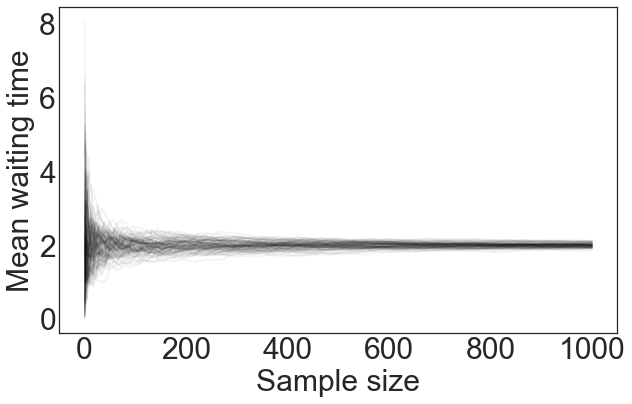

In [15]:
lines = plt.plot(samp_size, Y.T,alpha=.05,color='black')
plt.xlabel('Sample size');
plt.ylabel('Mean waiting time');

### Interpretation of Above Plot

The Law of Large Numbers (LLN) says that the sample mean converges to the population mean as the sample size grows (with probability 1). The sample mean is computed for each bus stop and in the plto above we can see how these sample means change as the sample size increases (starting at size 1 and growing up to 1000). In particular, we see that the mean waiting time is converging to 2 minutes for all bus stops.

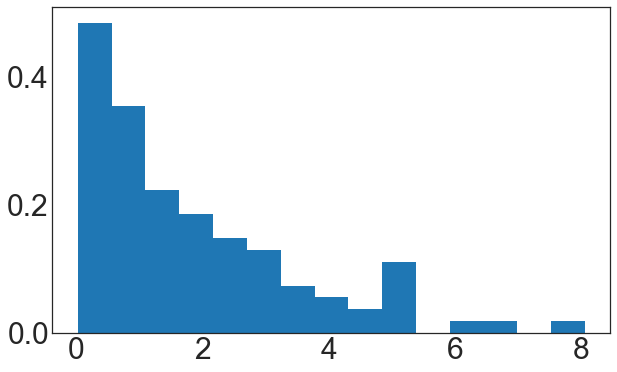

In [16]:
plt.hist(Y[:,0],bins=15,density=True);

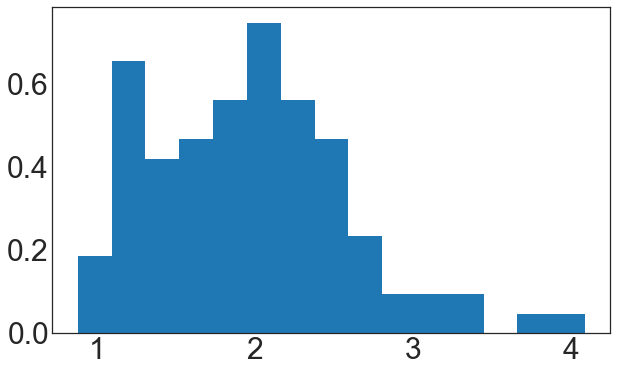

In [17]:
plt.hist(Y[:,9],bins=15,density=True);

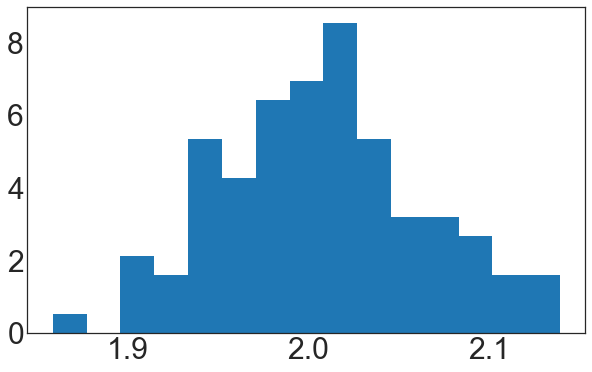

In [18]:
plt.hist(Y[:,m-1],bins=15,density=True);

### Interpretation of Above Plot

The Central Limit Theorem (CLT) refines the Law of Large Numbers by describing the distribution of the sample mean around the population mean. For large sample sizes the distribution is approximately normal with standard deviation equal to the standard deviation of one observation (one waiting time) over the square root of the sample size. In our case, the final sample size is $1000$ so we have
\begin{equation*}
2 / \sqrt{1000} \approx 0.063
\end{equation*}
This is roughly confirmed by the histogram on right (two standard deviations from the mean in each direction should cover most of the data). 

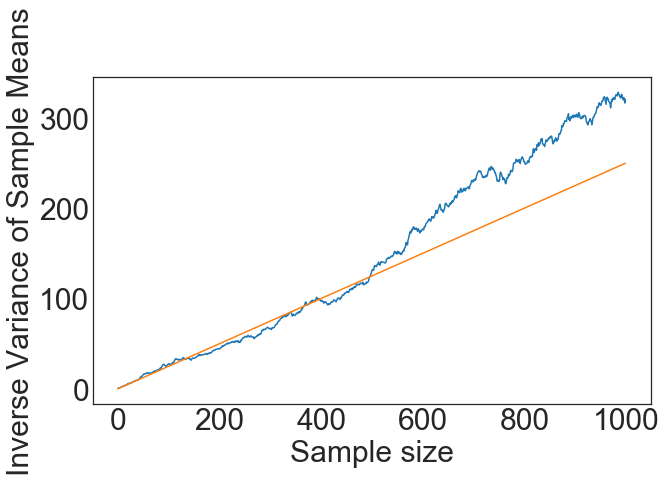

In [19]:
# part 4
plt.plot(1/np.var(Y,axis=0))
plt.xlabel('Sample size');
plt.ylabel('Inverse Variance of Sample Means');
plt.plot(np.arange(m),np.arange(m)*np.power(lam,2));

### Interpretation of Above Plot

This plot further confirms that the inverse variance of the sample mean is increasing linearly with sample size, as stated in the CLT. 

In [20]:
# part 5 - see the interpretations below the plots. 